# Setup
For the below problems, please use the `MNIST_784` data set from OpenML.  Prior to using the data, scale the data and split into a test and training dataset.  Use the first 60,000 images as training data, and the remaining 10,000 images as test data.

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#fetch OpenML data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

#split into test/training sets
N=60000
Ntrain = 5000
X_train, y_train = X[:N, :], y[:N]
X_test, y_test = X[N:, :], y[N:]

#scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Problem 1: Dimensionality Reduction
Reduce the dimensionality of the MNIST images to include 75% of the original variance.  How many components remain following the dimensionality reduction?

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.75)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

The number of components following the dimsionality reduction is the number of principal components:

In [ ]:
print(f"Dimensions prior to dimensionality reduction: {X.shape[1]}")
print(f"Dimensions after to dimensionality reduction: {pca.explained_variance_.shape[0]}")

Dimensions prior to dimensionality reduction: 784
Dimensions after to dimensionality reduction: 120


120 components remain following the dimensionality reduction. (Result may vary slightly)

# Problem 2: Support Vector Machines

Use a support vector machine to classify whether a digit is less than 5 (i.e., $y \in \left\{0, 1, 2, 3, 4\right\}$).  Find a set of hyperparameters, to include the kernel function, $C$, and (for kernels that support) $\gamma$ or $\delta$, that maximize the F1 score.

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV

In [ ]:
# recode test and training to new matrix
recode = lambda X: np.where(np.isin(X, ['0','1','2','3','4']),
                            np.ones_like(X, dtype=int),
                            np.zeros_like(X, dtype=int))

y_test_rcd = recode(y_test)
y_train_rcd = recode(y_train)

X_train_sample = X_train[:Ntrain, :]
y_train_rcd_sample = y_train_rcd[:Ntrain]

We can use a Grid Search to identify hyperparameters.  For efficiency, we will use a `SVC` classifier for kernel models and a `LinearSVC` classifier for a linear kernel.  Once both are run, we can identify the best estimator both classifiers.

To search over a wide range of space, we will search for values of $C$ and $\gamma$ over the range $1, 1\times10^6$ using a logarithmic scale, with 5 gradations.  (Additional gradations are more likely to find more outcomes, but at the cost of additional runtime.)

In [1]:
import numpy as np
np.logspace(0, 6, 5)

array([1.00000000e+00, 3.16227766e+01, 1.00000000e+03, 3.16227766e+04,
       1.00000000e+06])

In [ ]:
params = {'kernel': ['poly', 'rbf'],
          'C': np.logspace(0, 6, 5),
          'gamma': np.logspace(0, 6, 5)}

grid = GridSearchCV(SVC(), params, cv=5, verbose=3, scoring='f1')
grid.fit(X_train_sample, y_train_rcd_sample)
best_estimator_candidates = [(grid.best_estimator_, grid.best_score_)]

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=1.0, gamma=1.0, kernel=poly ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=1.0, gamma=1.0, kernel=poly, score=0.944, total=   1.2s
[CV] C=1.0, gamma=1.0, kernel=poly ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ....... C=1.0, gamma=1.0, kernel=poly, score=0.940, total=   1.1s
[CV] C=1.0, gamma=1.0, kernel=poly ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV] ....... C=1.0, gamma=1.0, kernel=poly, score=0.966, total=   1.1s
[CV] C=1.0, gamma=1.0, kernel=poly ...................................
[CV] ....... C=1.0, gamma=1.0, kernel=poly, score=0.960, total=   1.1s
[CV] C=1.0, gamma=1.0, kernel=poly ...................................
[CV] ....... C=1.0, gamma=1.0, kernel=poly, score=0.940, total=   1.1s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=1.0, gamma=1.0, kernel=rbf, score=0.676, total=   5.1s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=1.0, gamma=1.0, kernel=rbf, score=0.676, total=   5.8s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=1.0, gamma=1.0, kernel=rbf, score=0.677, total=   5.2s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=1.0, gamma=1.0, kernel=rbf, score=0.677, total=   4.9s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 11.4min finished


We repeat the grid search for a linear classifier.

In [ ]:
params = {'C': np.logspace(0, 6, 5)}

grid = GridSearchCV(LinearSVC(max_iter=10000), params, cv=5, verbose=3, scoring='f1')
grid.fit(X_train_sample, y_train_rcd_sample)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=1.0 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.2s remaining:    0.0s


[CV] ............................... C=1.0, score=0.854, total=  13.2s
[CV] C=1.0 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   26.0s remaining:    0.0s


[CV] ............................... C=1.0, score=0.883, total=  12.8s
[CV] C=1.0 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................... C=1.0, score=0.851, total=  12.9s
[CV] C=1.0 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................... C=1.0, score=0.850, total=  13.5s
[CV] C=1.0 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................... C=1.0, score=0.866, total=  13.1s
[CV] C=31.622776601683793 ............................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................ C=31.622776601683793, score=0.829, total=  14.3s
[CV] C=31.622776601683793 ............................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................ C=31.622776601683793, score=0.851, total=  14.6s
[CV] C=31.622776601683793 ............................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................ C=31.622776601683793, score=0.846, total=  14.9s
[CV] C=31.622776601683793 ............................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................ C=31.622776601683793, score=0.802, total=  14.4s
[CV] C=31.622776601683793 ............................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................ C=31.622776601683793, score=0.828, total=  14.4s
[CV] C=1000.0 ........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................ C=1000.0, score=0.826, total=  14.9s
[CV] C=1000.0 ........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................ C=1000.0, score=0.605, total=  15.7s
[CV] C=1000.0 ........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................ C=1000.0, score=0.745, total=  14.9s
[CV] C=1000.0 ........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................ C=1000.0, score=0.731, total=  15.4s
[CV] C=1000.0 ........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................ C=1000.0, score=0.804, total=  14.3s
[CV] C=31622.776601683792 ............................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................ C=31622.776601683792, score=0.813, total=  14.2s
[CV] C=31622.776601683792 ............................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................ C=31622.776601683792, score=0.793, total=  14.8s
[CV] C=31622.776601683792 ............................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................ C=31622.776601683792, score=0.803, total=  14.1s
[CV] C=31622.776601683792 ............................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................ C=31622.776601683792, score=0.757, total=  15.1s
[CV] C=31622.776601683792 ............................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................ C=31622.776601683792, score=0.812, total=  14.2s
[CV] C=1000000.0 .....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ......................... C=1000000.0, score=0.816, total=  15.0s
[CV] C=1000000.0 .....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ......................... C=1000000.0, score=0.759, total=  14.2s
[CV] C=1000000.0 .....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ......................... C=1000000.0, score=0.775, total=  14.4s
[CV] C=1000000.0 .....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ......................... C=1000000.0, score=0.784, total=  14.5s
[CV] C=1000000.0 .....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  6.0min finished


[CV] ......................... C=1000000.0, score=0.735, total=  14.7s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=10000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 3.16227766e+01, 1.00000000e+03, 3.16227766e+04,
       1.00000000e+06])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=3)

The linear CSV does not converge.  We select the best estimator:

In [ ]:
best_estimator_candidates.append((grid.best_estimator_, grid.best_score_))
best_estimator = best_estimator_candidates[np.argmax([x[1] for x in best_estimator_candidates])][0]

# note: best estimator found through an exhaustive search
# best_estimator = SVC(C=0.01, gamma=0.016237767391887217, kernel='poly')
# best_estimator.fit(X_train, y_train_rcd)

# Problem 3: Evaluation
Using the best estimator found in the the previous problem, show the confusion matrix for both the training and test data.

We begin by using CV prediction for the training set and showing the resultant confusion matrix and classification report.

In [ ]:
y_pred_train = cross_val_predict(best_estimator, X_train, y_train_rcd)

In [ ]:
# Helper function to plot confusion matrix
def show_classification_matrix(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(cm, annot=True, fmt="0")
  ax = plt.gca()
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Actual")

In [ ]:
print(classification_report(y_train_rcd, y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     29404
           1       0.98      0.98      0.98     30596

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000



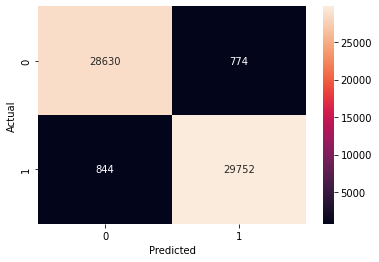

In [ ]:
show_classification_matrix(y_train_rcd, y_pred_train)

We can predict the test data directly from the estimator, which shows similar performance and suggests predictive validity.

In [ ]:
y_pred_test = best_estimator.predict(X_test)
print(classification_report(y_test_rcd, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4861
           1       0.95      0.95      0.95      5139

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



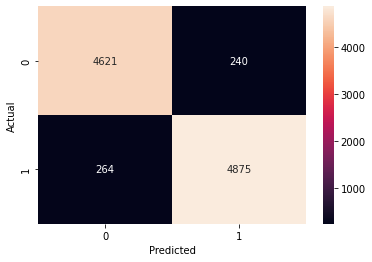

In [ ]:
show_classification_matrix(y_test_rcd, y_pred_test)